In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Load and Cleaning


In [2]:
dataset = pd.read_csv(
    "../dataset/Merged-Responses-of-Impact-of-AI-Tools-on-Students-Sheet1.csv",
    engine="pyarrow",
)

dataset.columns

Index(['INSTITUTE', 'Academic Background', 'Gender', 'Age', 'Education Level',
       'Location', 'AI Tools Familiarity', 'Known AI Tools', 'AI Use Cases',
       'AI Usage in Academics', 'AI Over Web/Books', 'AI for Brainstorming',
       'AI for Decisions', 'AI Plugin Usages', 'Motivations for AI Usage',
       'Best Features of AI Tools', 'AI Saves Time', 'Faster Work with AI',
       'AI helped Completing Tasks', 'Problem Faced in AI Tools',
       'Wrong and Inconsistent AI Answers', 'Privacy Concerns',
       'Aware of Academic Honesty Policy', 'Institution's Policy Against AI',
       'Discussed about Ethical Usages of AI', 'Teachers are Aware of AI Use',
       'Continuing AI Usage despite Advices Against AI',
       'Supporting allowance of AI Tools Usage for Students',
       'Supporting Fair Use - Paraphrasing, Proofing, Summarizing ',
       'Did Unethical AI Use', 'Reasons for Unethical Use',
       'Penalized for AI Use',
       'Perspective on AI Content as Copies of Ori

In [3]:
dataset.columns = dataset.columns.str.strip()

In [4]:
sns.set_theme(style="whitegrid")

# Demographic Analysis


### Age Distribution


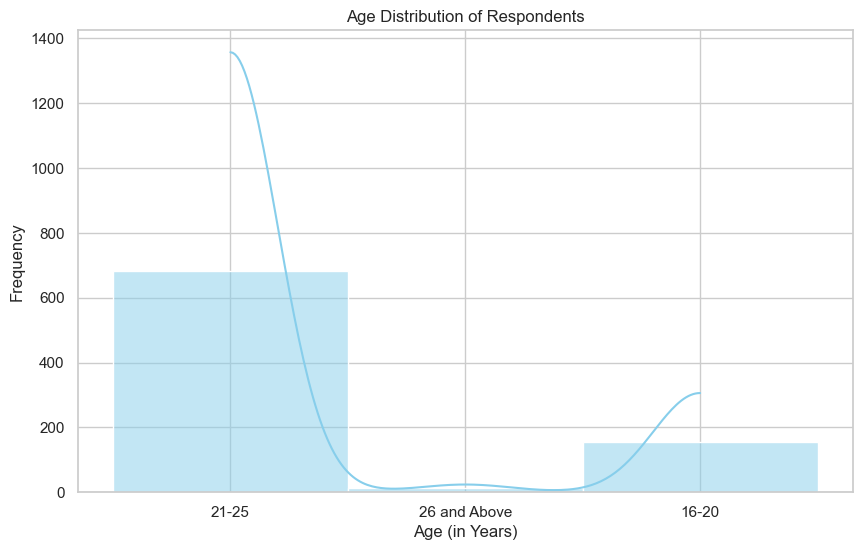

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset["Age"], bins=10, kde=True, color="skyblue")
plt.title("Age Distribution of Respondents")
plt.xlabel("Age (in Years)")
plt.ylabel("Frequency")
filename = "../results/age_distribution_of_respondents.png"
plt.show()

### Gender Ratio


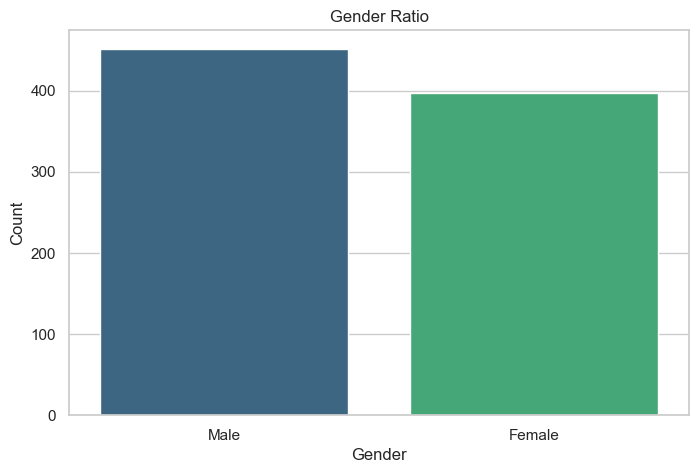

In [6]:
plt.figure(figsize=(8, 5))
gender_counts = dataset["Gender"].value_counts()
gender_counts = gender_counts[gender_counts.index != "Helicopter"]
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    hue=gender_counts.index,
    palette="viridis",
    legend=False,
)
plt.title("Gender Ratio")
plt.xlabel("Gender")
plt.ylabel("Count")
filename = "../results/gender_ratio.png"
plt.savefig(filename)
plt.show()

### Educational Level and Academic Discipline


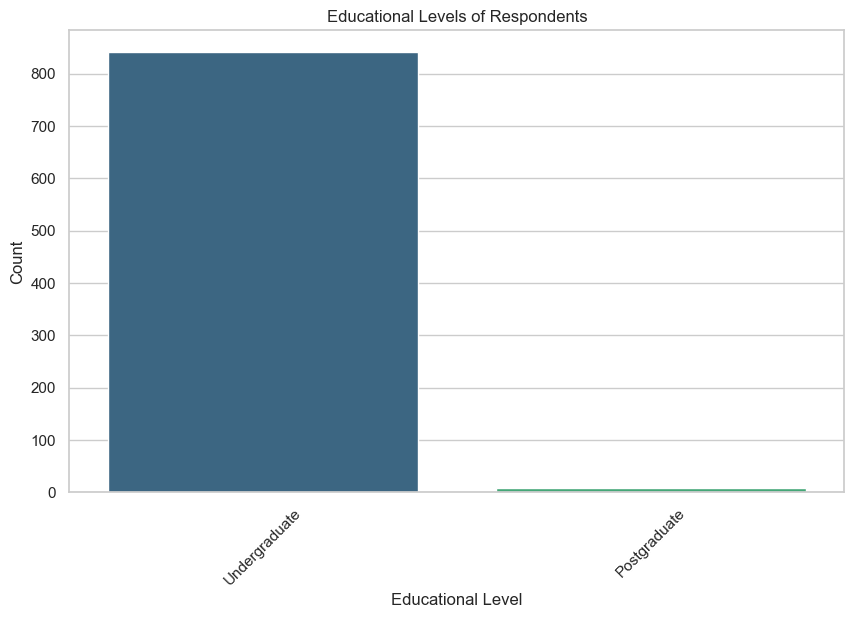

In [7]:
plt.figure(figsize=(10, 6))
edu_counts = dataset["Education Level"].value_counts()
sns.barplot(
    x=edu_counts.index,
    y=edu_counts.values,
    palette="viridis",
    hue=edu_counts.index,
    legend=False,
)
plt.title("Educational Levels of Respondents")
plt.xlabel("Educational Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
filename = "../results/educational_levels_of_respondents.png"
plt.savefig(filename)
plt.show()

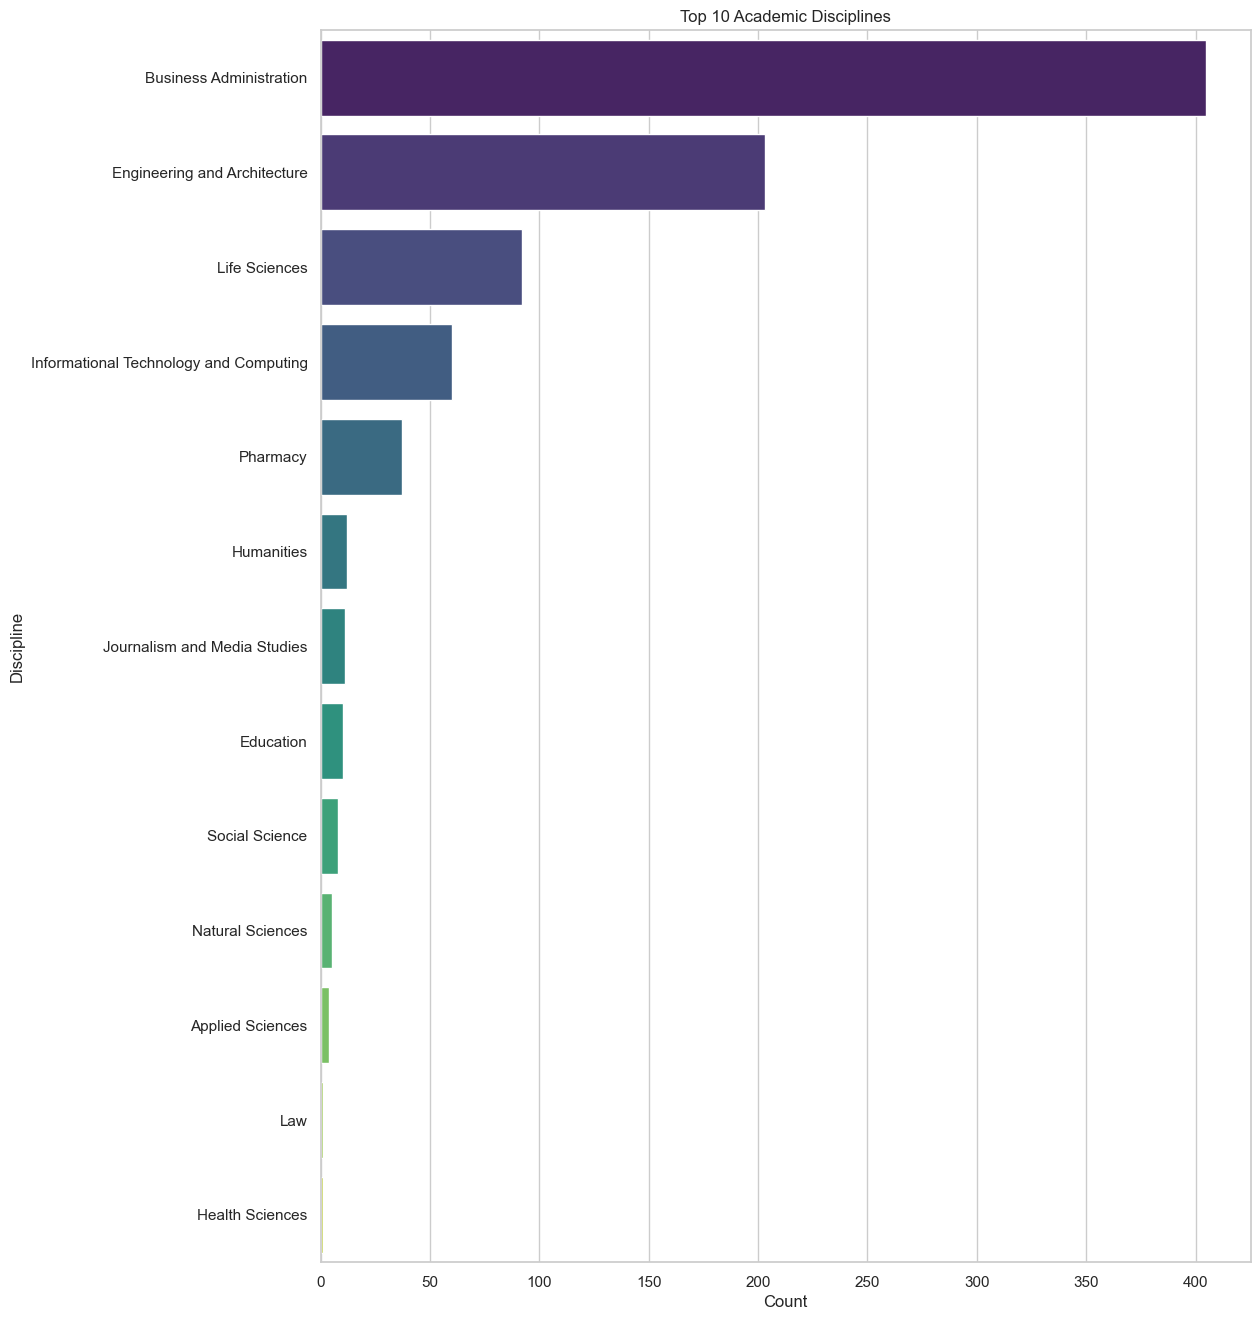

In [9]:
major_counts = dataset["Academic Background"].value_counts()

# These two are more or less the same major, so we combine them
major_counts["Informational Technology and Computing"] += major_counts[
    "Informational Technology"
]
major_counts = major_counts.drop("Informational Technology")

plt.figure(figsize=(12, 16))
sns.barplot(
    y=major_counts.index,
    x=major_counts.values,
    palette="viridis",
    hue=major_counts.index,
    legend=False,
)
plt.title("Top 10 Academic Disciplines")
plt.xlabel("Count")
plt.ylabel("Discipline")
filename = "../results/top_10_academic_disciplines.png"
plt.savefig(filename)
plt.show()

# AI Tools Familiarity and Usage Statistics


### AI Tools Familiarity


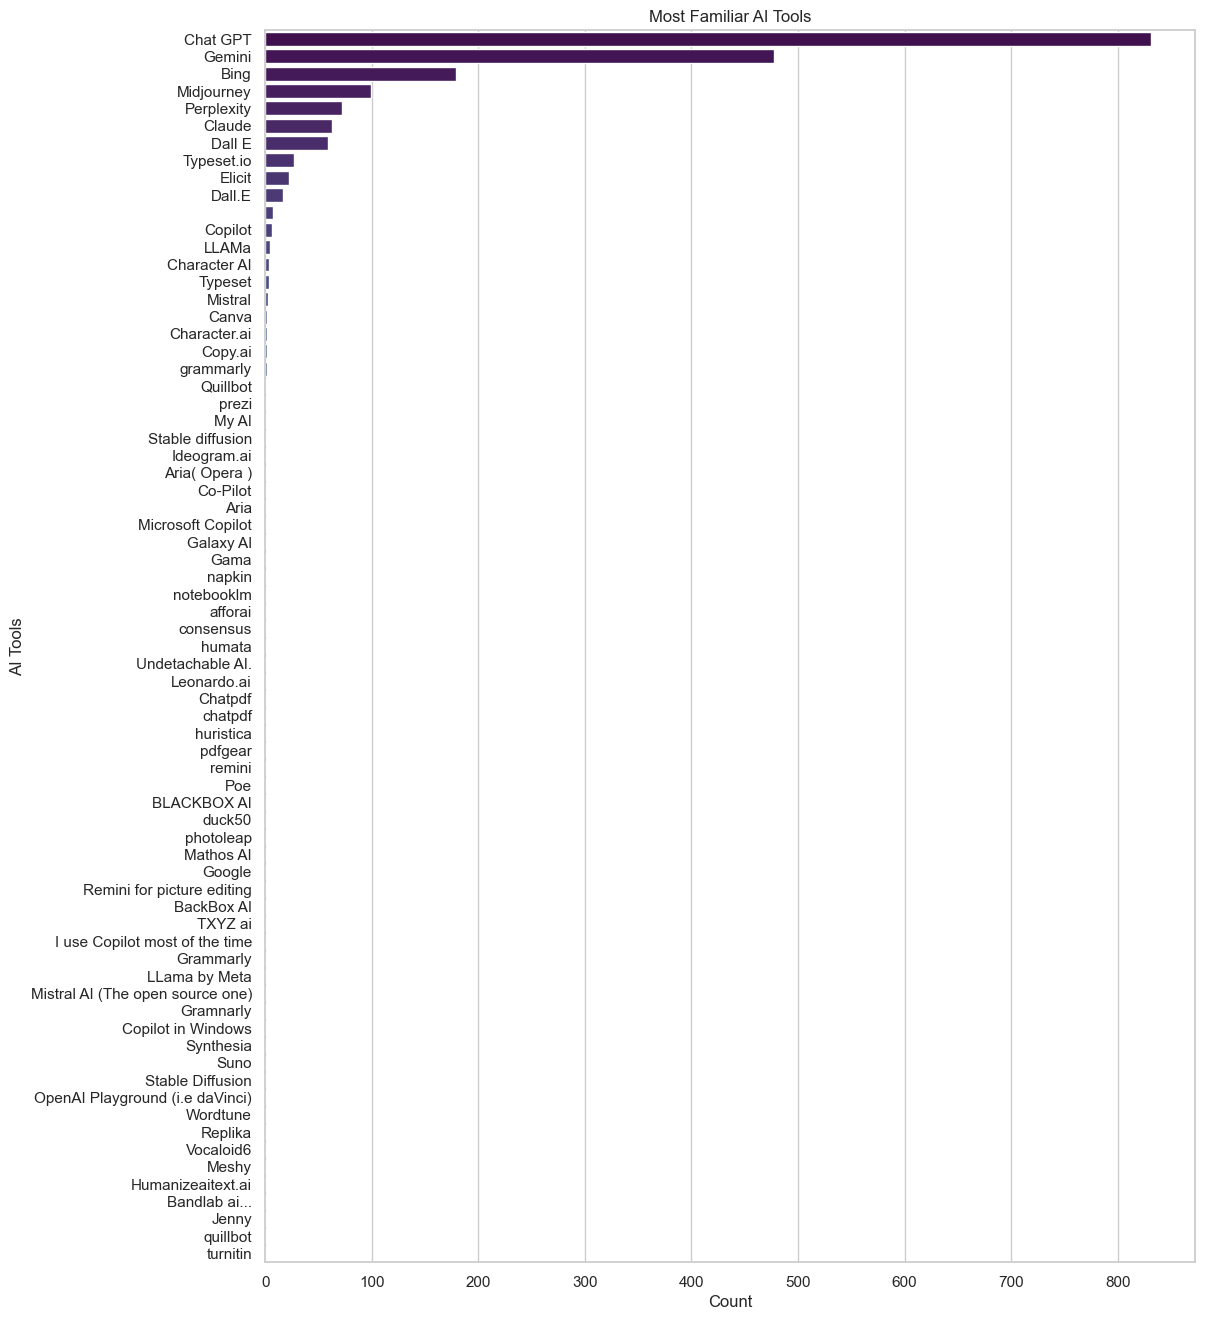

In [11]:
tools_familiarity = (
    dataset["Known AI Tools"]
    .str.split(",")
    .dropna()
    .explode()
    .str.strip()
    .value_counts()
)

# Plot the most familiar AI tools
plt.figure(figsize=(12, 16))
sns.barplot(
    y=tools_familiarity.index,
    x=tools_familiarity.values,
    palette="viridis",
    hue=tools_familiarity.index,
    legend=False,
)
plt.title("Most Familiar AI Tools")
plt.xlabel("Count")
plt.ylabel("AI Tools")
filename = "../results/most_familiar_ai_tools_all.png"
plt.savefig(filename)
plt.show()

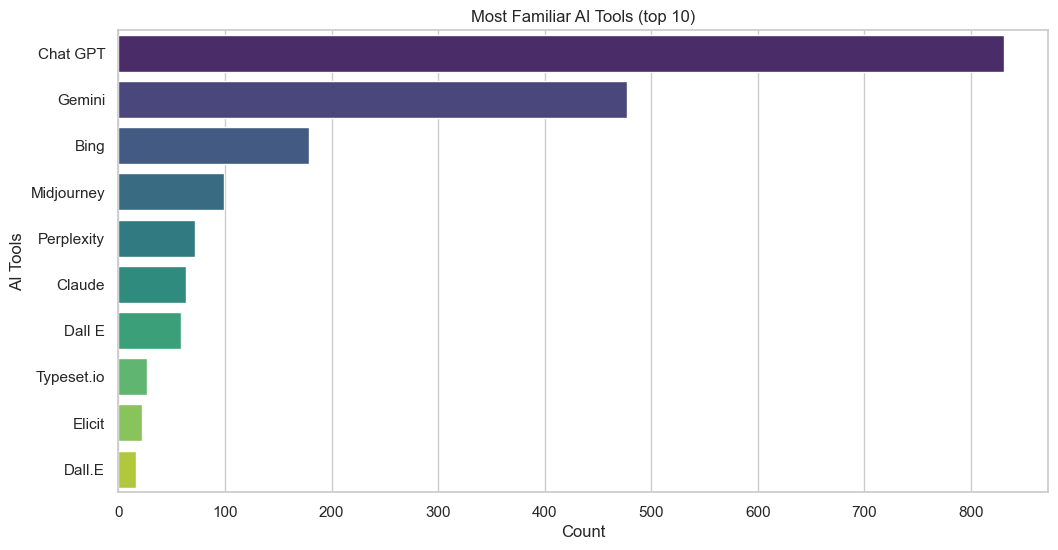

In [12]:
# Plot the most familiar AI tools (top 10)
plt.figure(figsize=(12, 6))
sns.barplot(
    y=tools_familiarity.index[:10],
    x=tools_familiarity.values[:10],
    palette="viridis",
    hue=tools_familiarity.index[:10],
    legend=False,
)
plt.title("Most Familiar AI Tools (top 10)")
plt.xlabel("Count")
plt.ylabel("AI Tools")
filename = "../results/most_familiar_ai_tools_top_10.png"
plt.savefig(filename)
plt.show()

### AI Tools Usage


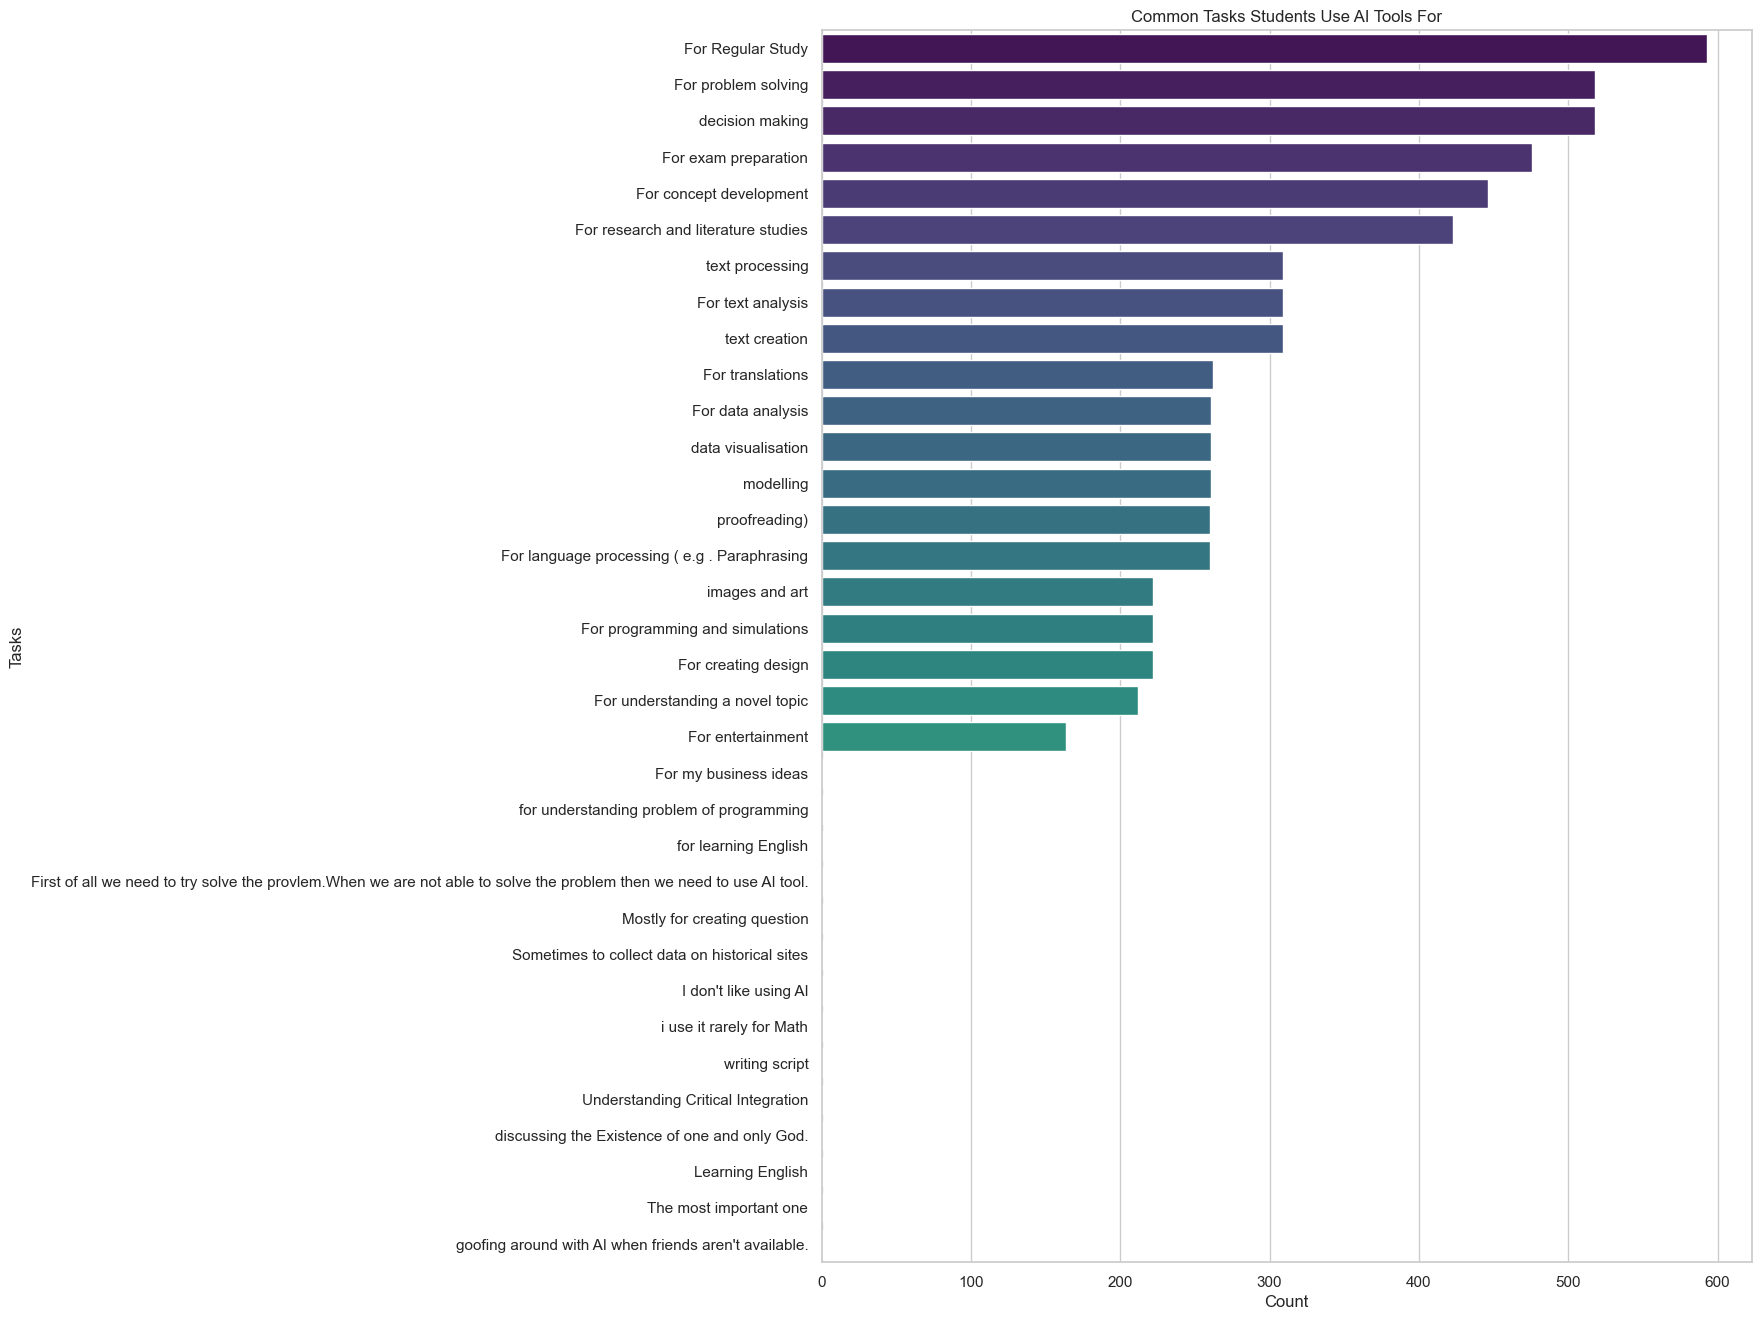

In [18]:
# Flatten the lists and count occurrences for usage tasks
tasks_usage = (
    dataset["AI Use Cases"].dropna().str.split(",").explode().str.strip().value_counts()
)
tasks_usage = tasks_usage[tasks_usage.index != ""]

# Plot the common tasks for AI usage
plt.figure(figsize=(12, 16))
sns.barplot(
    y=tasks_usage.index,
    x=tasks_usage.values,
    palette="viridis",
    hue=tasks_usage.index,
    legend=False,
)
plt.title("Common Tasks Students Use AI Tools For")
plt.xlabel("Count")
plt.ylabel("Tasks")
filename = "../results/common_tasks_students_use_ai_tools_for_all.png"
plt.savefig(filename)
plt.show()

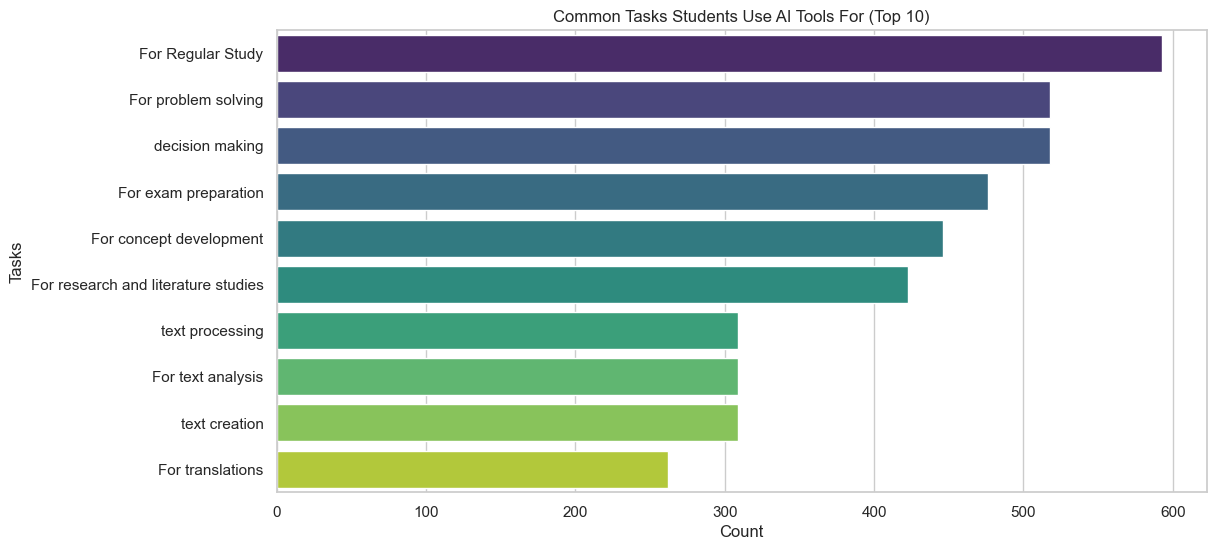

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(
    y=tasks_usage.index[:10],
    x=tasks_usage.values[:10],
    palette="viridis",
    hue=tasks_usage.index[:10],
    legend=False,
)
plt.title("Common Tasks Students Use AI Tools For (Top 10)")
plt.xlabel("Count")
plt.ylabel("Tasks")
filename = "../results/common_tasks_students_use_ai_tools_for_all_top_10.png"
plt.savefig(filename)
plt.show()

### Motivation for Using AI Tools

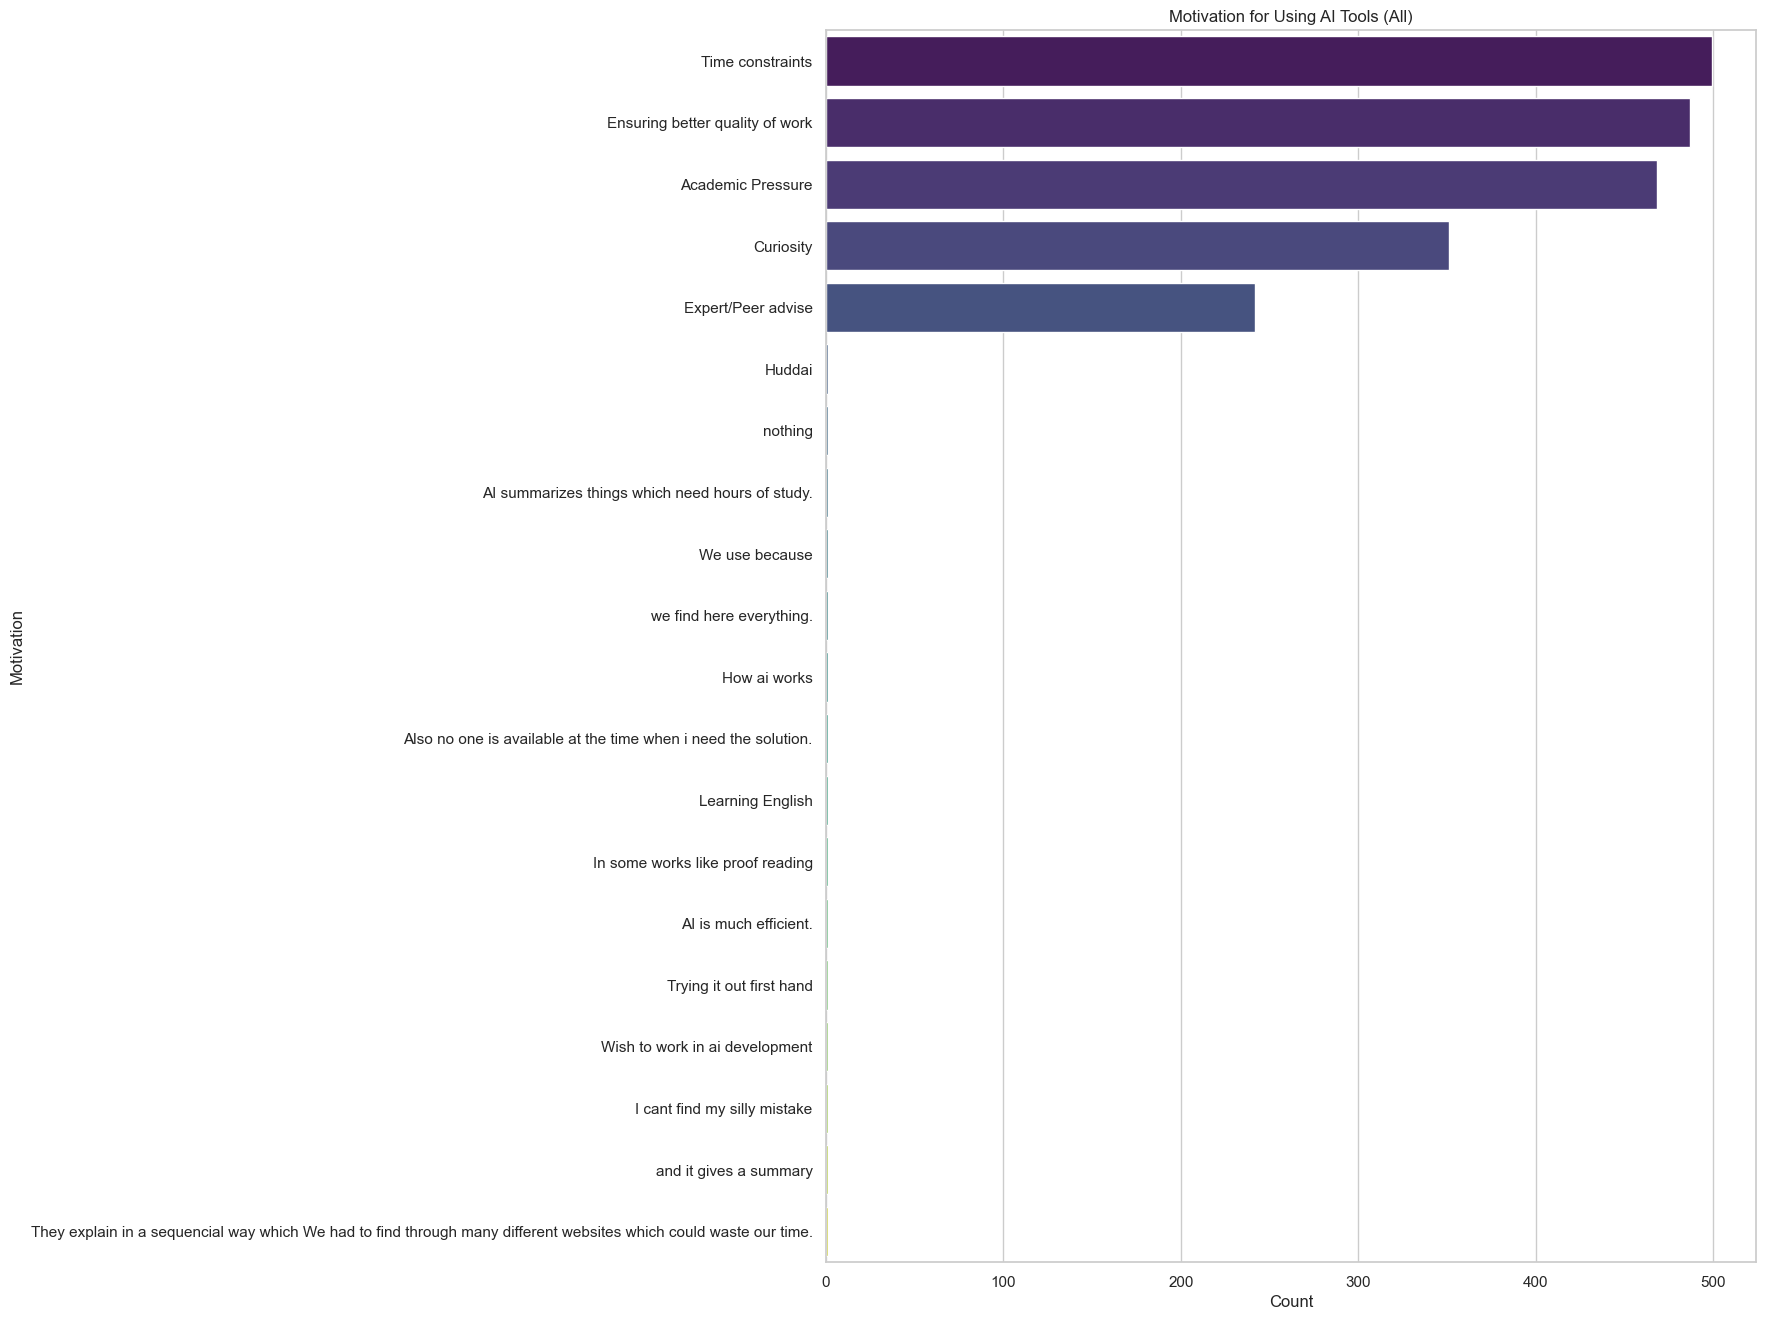

In [51]:
motivation_data_all = (
    dataset["Motivations for AI Usage"]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
)

motivation_data_all = motivation_data_all[motivation_data_all.index != ""]

# Plot the motivation for using AI tools
plt.figure(figsize=(12, 16))
sns.barplot(
    y=motivation_data_all.index,
    x=motivation_data_all.values,
    palette="viridis",
    hue=motivation_data_all.index,
    legend=False,
)

plt.title("Motivation for Using AI Tools (All)")
plt.xlabel("Count")
plt.ylabel("Motivation")
filename = "../results/motivation_for_using_ai_tools_all.png"
plt.savefig(filename)
plt.show()

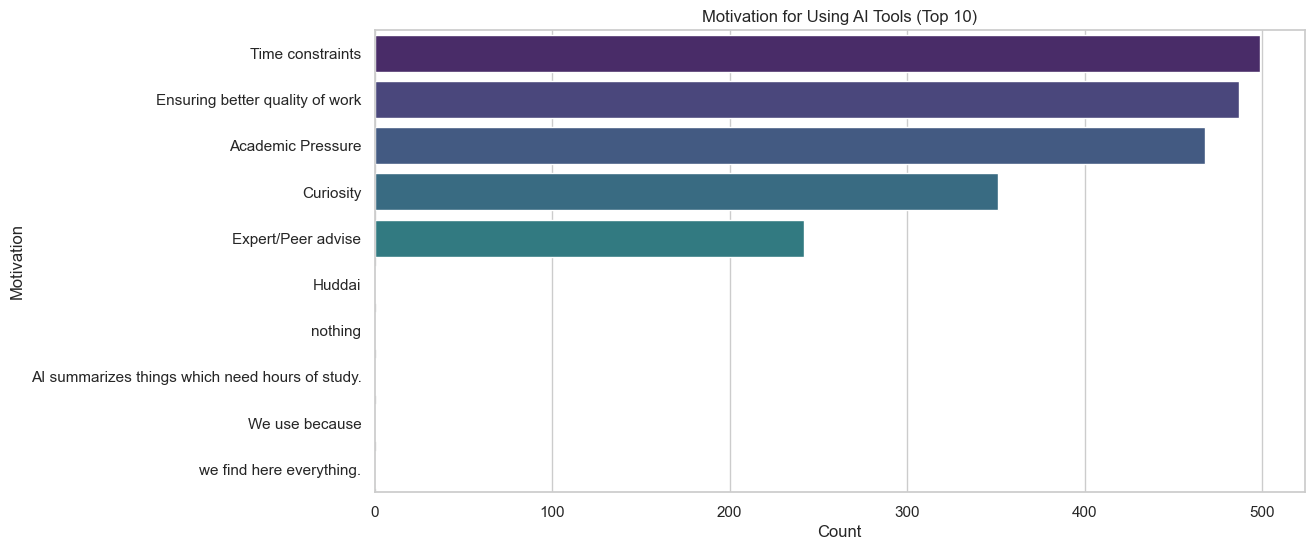

In [52]:
motivation_data_top_10 = motivation_data_all[:10]

plt.figure(figsize=(12, 6))
sns.barplot(
    y=motivation_data_top_10.index,
    x=motivation_data_top_10.values,
    palette="viridis",
    hue=motivation_data_top_10.index,
    legend=False,
)

plt.title("Motivation for Using AI Tools (Top 10)")
plt.xlabel("Count")
plt.ylabel("Motivation")
filename = "../results/motivation_for_using_ai_tools_top_10.png"
plt.savefig(filename)
plt.show()

# Usage Trends


### Frequency of AI tool usage (Understanding Complex Topics)


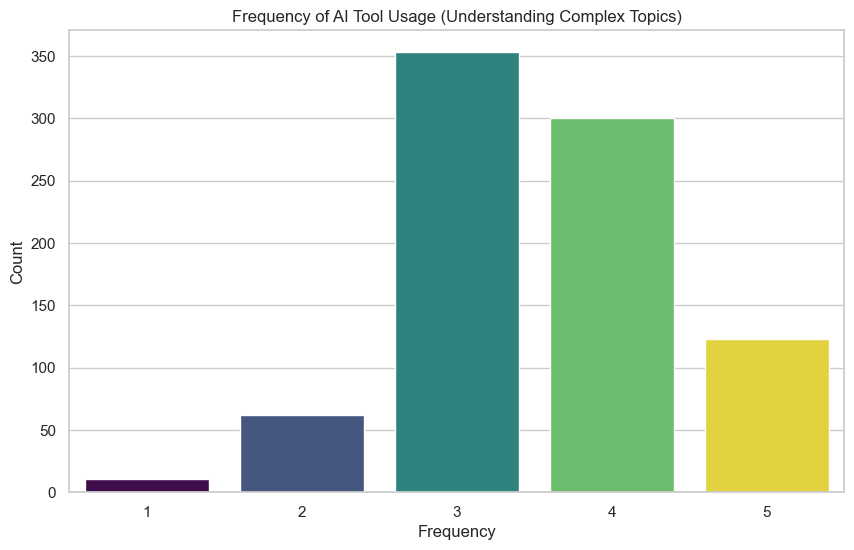

In [20]:
usage_frequency = dataset["AI for Complex Topics"].value_counts()

usage_frequency.index = usage_frequency.index.map(
    {
        "Always": 5,
        "Often": 4,
        "Sometimes": 3,
        "Rarely": 2,
        "Never": 1,
    }
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=usage_frequency.index,
    y=usage_frequency.values,
    palette="viridis",
    hue=usage_frequency.index,
    legend=False,
)
plt.title("Frequency of AI Tool Usage (Understanding Complex Topics)")
plt.xlabel("Frequency")
plt.ylabel("Count")
filename = "../results/frequency_of_ai_tool_usage_understanding_complex_topics.png"
plt.savefig(filename)
plt.show()

### Frequency of AI tool usage (Decision Making)


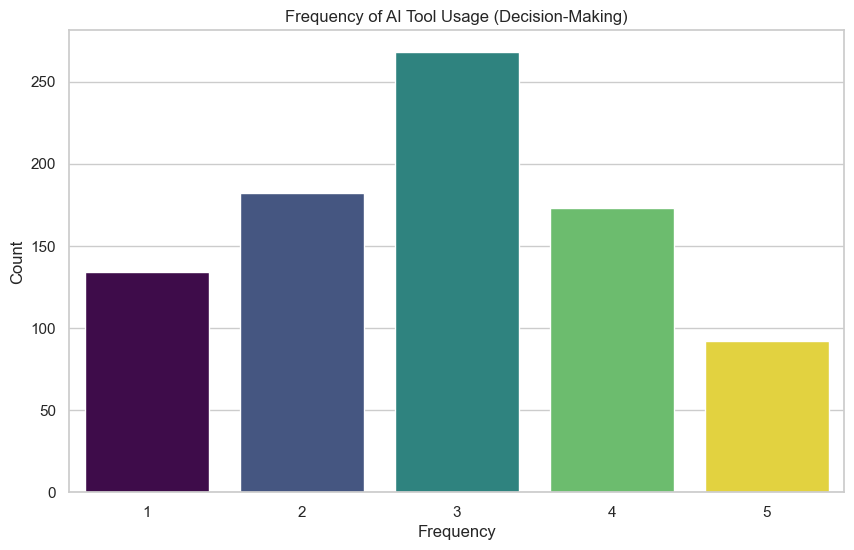

In [21]:
plt.figure(figsize=(10, 6))
usage_frequency = dataset["AI for Decisions"].value_counts()

sns.barplot(
    x=usage_frequency.index,
    y=usage_frequency.values,
    palette="viridis",
    hue=usage_frequency.index,
    legend=False,
)

plt.title("Frequency of AI Tool Usage (Decision-Making)")
plt.xlabel("Frequency")
plt.ylabel("Count")
filename = "../results/frequency_of_ai_tool_usage_decision_making.png"
plt.savefig(filename)

### Frequency of AI tool usage (Studies and Academics)


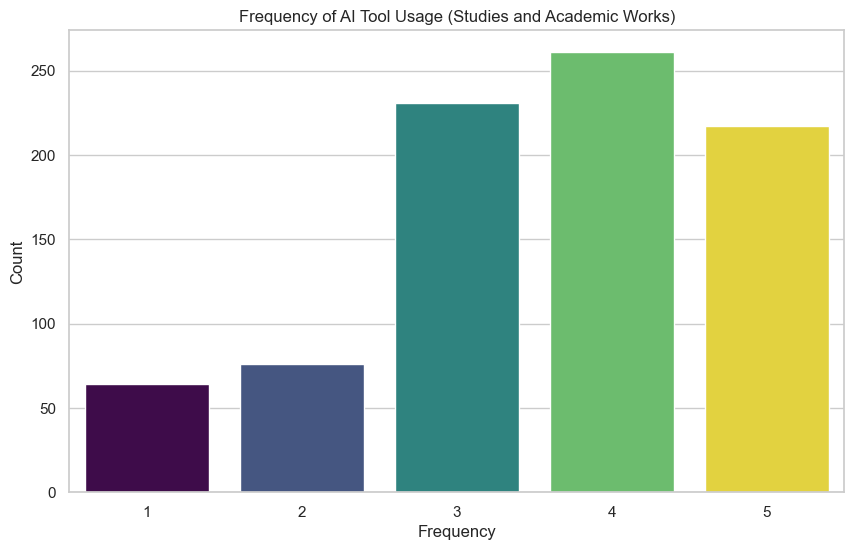

In [22]:
plt.figure(figsize=(10, 6))
usage_frequency = dataset["AI Usage in Academics"].value_counts()

sns.barplot(
    x=usage_frequency.index,
    y=usage_frequency.values,
    palette="viridis",
    hue=usage_frequency.index,
    legend=False,
)

plt.title("Frequency of AI Tool Usage (Studies and Academic Works)")
plt.xlabel("Frequency")
plt.ylabel("Count")
filename = "../results/frequency_of_ai_tool_usage_studies_academic_works.png"
plt.savefig(filename)
plt.show()

### Frequency of AI tool usage (Idea Generation)


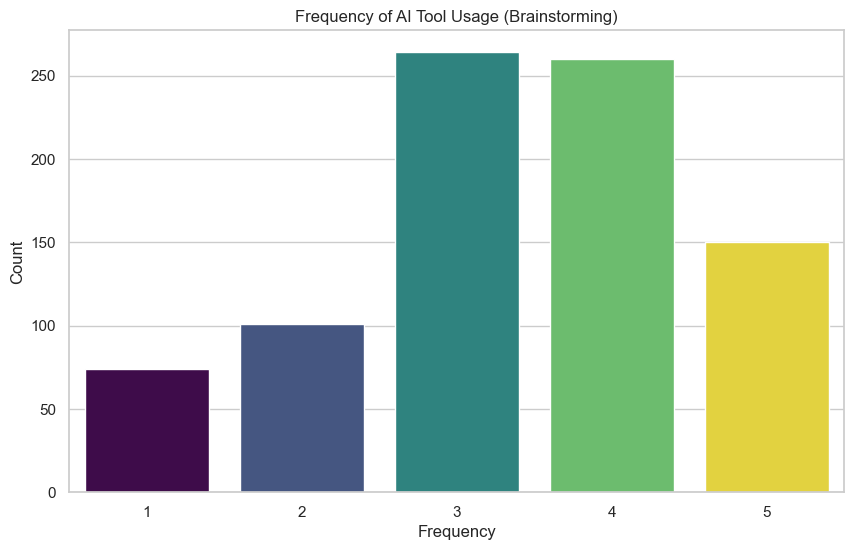

In [23]:
plt.figure(figsize=(10, 6))
usage_frequency = dataset["AI for Brainstorming"].value_counts()

sns.barplot(
    x=usage_frequency.index,
    y=usage_frequency.values,
    palette="viridis",
    hue=usage_frequency.index,
    legend=False,
)

plt.title("Frequency of AI Tool Usage (Brainstorming)")
plt.xlabel("Frequency")
plt.ylabel("Count")
filename = "../results/frequency_of_ai_tool_usage_brainstorming.png"
plt.savefig(filename)
plt.show()

### Combined Frequency of AI tool usage


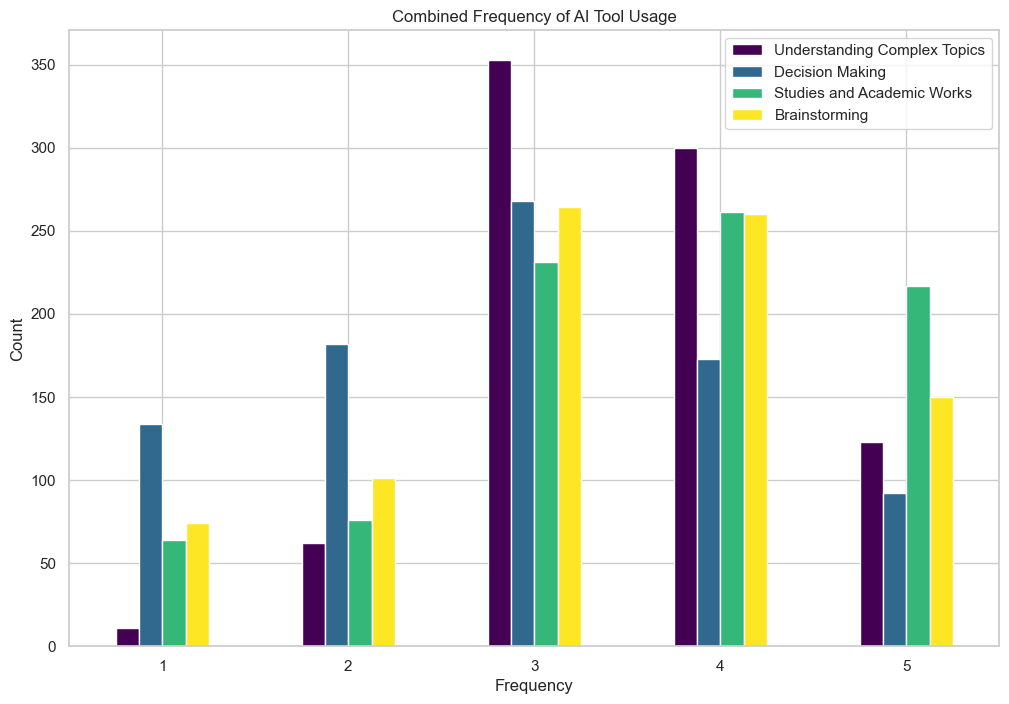

In [24]:
# Combine all the frequency of AI tool usage
usage_columns = [
    "AI for Complex Topics",
    "AI for Decisions",
    "AI Usage in Academics",
    "AI for Brainstorming",
]

usage_frequency_1 = dataset[usage_columns[0]].value_counts()


# Convert the frequency to numerical values
usage_frequency_1.index = usage_frequency_1.index.map(
    {"Always": 5, "Often": 4, "Sometimes": 3, "Rarely": 2, "Never": 1}
)

usage_frequency_2 = dataset[usage_columns[1]].value_counts()
usage_frequency_3 = dataset[usage_columns[2]].value_counts()
usage_frequency_4 = dataset[usage_columns[3]].value_counts()

combined_usage_frequency = pd.concat(
    [usage_frequency_1, usage_frequency_2, usage_frequency_3, usage_frequency_4],
    axis=1,
    sort=True,
).fillna(0)

combined_usage_frequency.columns = [
    "Understanding Complex Topics",
    "Decision Making",
    "Studies and Academic Works",
    "Brainstorming",
]

# Plot the combined frequency of AI tool usage
plt.figure(figsize=(12, 8))
combined_usage_frequency.plot(kind="bar", colormap="viridis", ax=plt.gca())
plt.title("Combined Frequency of AI Tool Usage")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.xticks(rotation=0)
filename = "../results/combined_frequency_of_ai_tool_usage.png"
plt.savefig(filename)
plt.show()

### Preferences of AI Tools Over Traditional Methods (Books, Web) for Learning


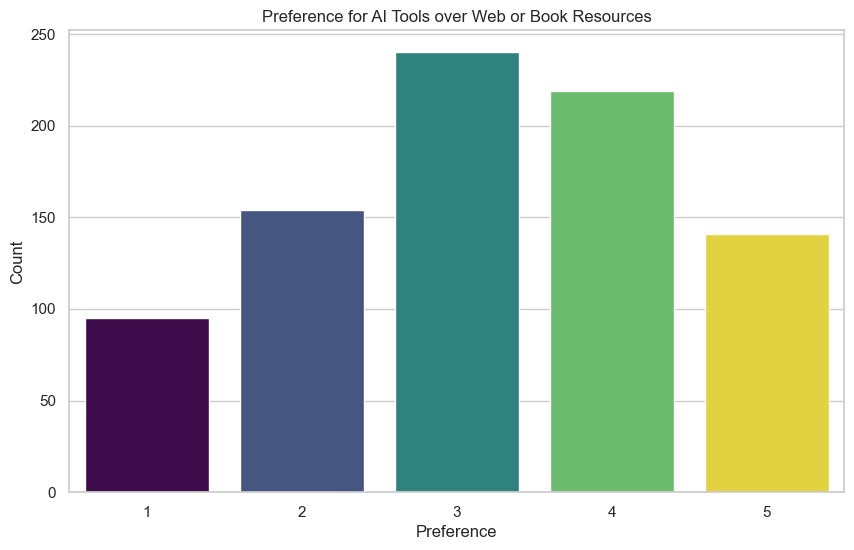

In [25]:
preference_data = dataset["AI Over Web/Books"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=preference_data.index,
    y=preference_data.values,
    palette="viridis",
    hue=preference_data.index,
    legend=False,
)

plt.title("Preference for AI Tools over Web or Book Resources")
plt.xlabel("Preference")
plt.ylabel("Count")
filename = "../results/preference_for_ai_tools_over_web_or_book_resources.png"
plt.savefig(filename)
plt.show()

# Preference for AI Tools Over Traditional Teaching Methods


### Trust in AI Tools vs Teachers


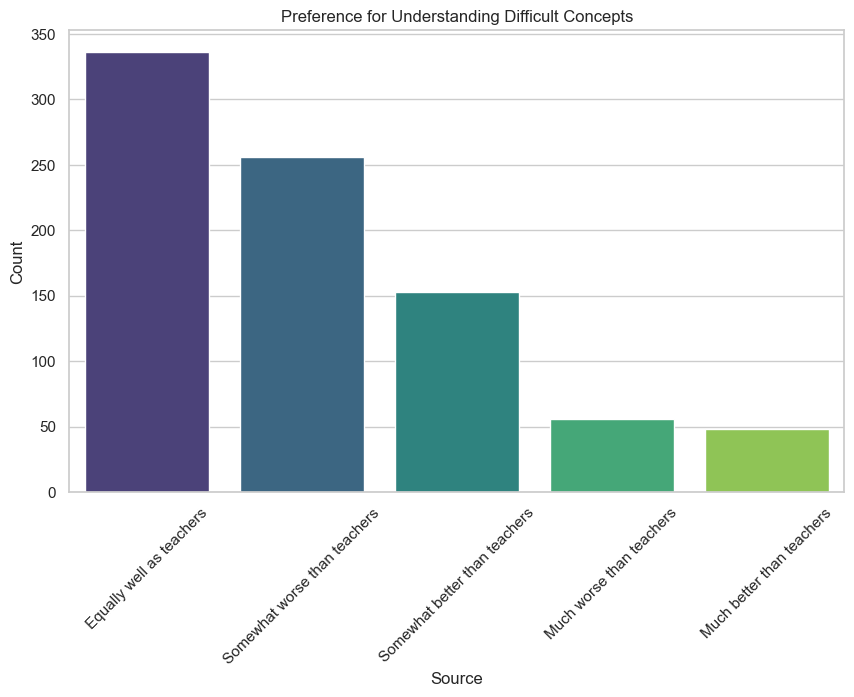

In [26]:
preference_data = dataset["AI vs. Teacher Understanding"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=preference_data.index,
    y=preference_data.values,
    palette="viridis",
    hue=preference_data.index,
    legend=False,
)
plt.title("Preference for Understanding Difficult Concepts")
plt.xlabel("Source")
plt.ylabel("Count")
plt.xticks(rotation=45)
filename = "../results/preference_for_understanding_difficult_concepts.png"
plt.savefig(filename)
plt.show()

### Trust in Accuracy of Answers from AI Tools vs Teachers


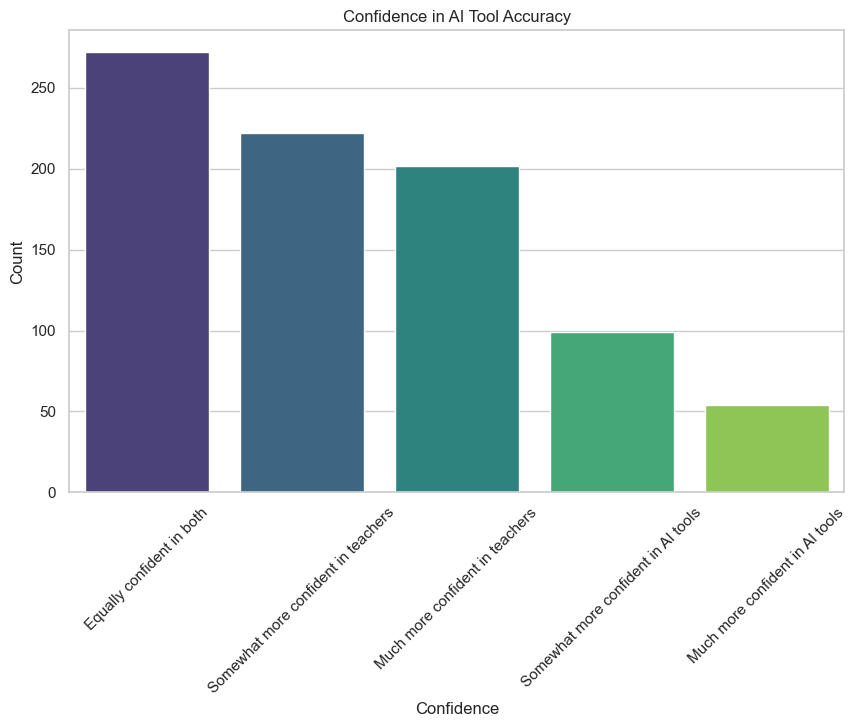

In [27]:
preference_data = dataset["Confidence in AI vs. Teachers"].value_counts()

plt.figure(figsize=(10, 6))

sns.barplot(
    x=preference_data.index,
    y=preference_data.values,
    palette="viridis",
    hue=preference_data.index,
    legend=False,
)

plt.title("Confidence in AI Tool Accuracy")
plt.xlabel("Confidence")
plt.ylabel("Count")
plt.xticks(rotation=45)
filename = "../results/confidence_in_ai_tool_accuracy.png"
plt.savefig(filename)
plt.show()

### Bias in AI Tools vs Teachers


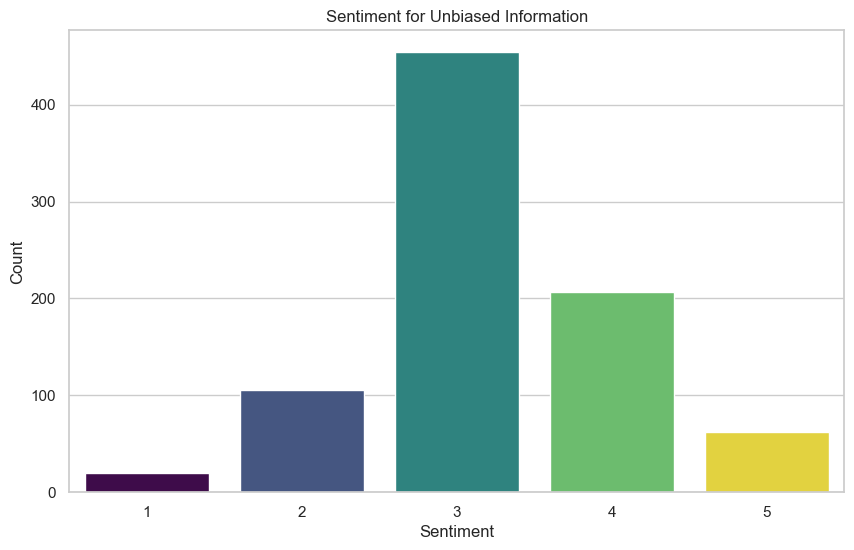

In [32]:
preference_data = dataset["Unbiased Info by AI"].value_counts()

preference_data.index = preference_data.index.map(
    {
        "Strongly disagree": 1,
        "Disagree": 2,
        "Neutral": 3,
        "Agree": 4,
        "Strongly agree": 5,
    }
)


plt.figure(figsize=(10, 6))

sns.barplot(

    x=preference_data.index,

    y=preference_data.values,

    palette="viridis",

    hue=preference_data.index,

    legend=False,
)


plt.title("Sentiment for Unbiased Information")

plt.xlabel("Sentiment")

plt.ylabel("Count")

filename = "../results/sentiment_for_unbiased_information.png"

plt.savefig(filename)

plt.show()

### Understanding Context of Assignments by AI Tools vs Teachers


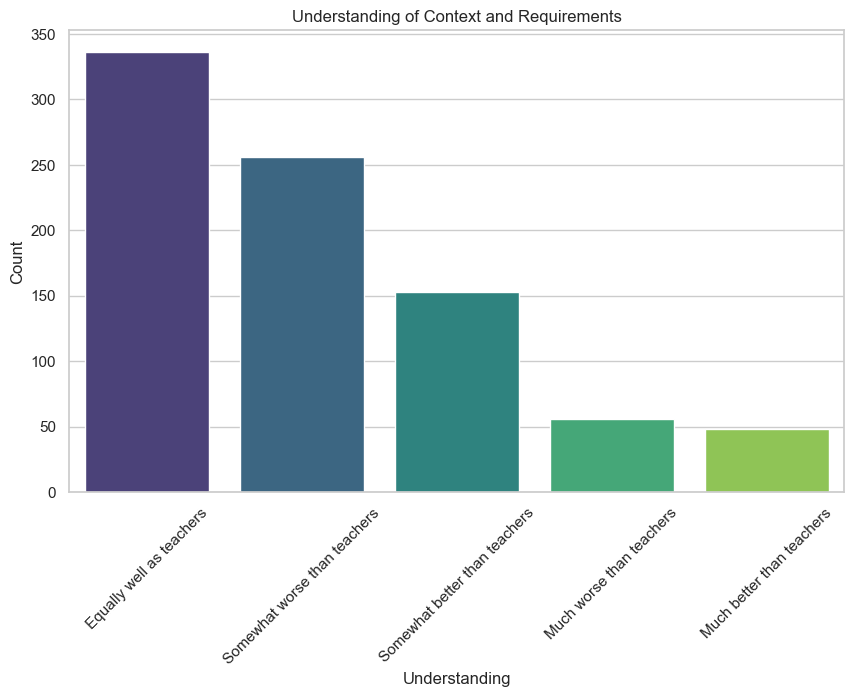

In [33]:
preference_data = dataset["AI vs. Teacher Understanding"].value_counts()

plt.figure(figsize=(10, 6))

sns.barplot(
    x=preference_data.index,
    y=preference_data.values,
    palette="viridis",
    hue=preference_data.index,
    legend=False,
)

plt.title("Understanding of Context and Requirements")
plt.xlabel("Understanding")
plt.ylabel("Count")
plt.xticks(rotation=45)
filename = "../results/understanding_of_context_and_requirements.png"
plt.savefig(filename)
plt.show()

# Dependency on AI Tools for Work or Study


### AI Tools in Reducing Time Spent and work load


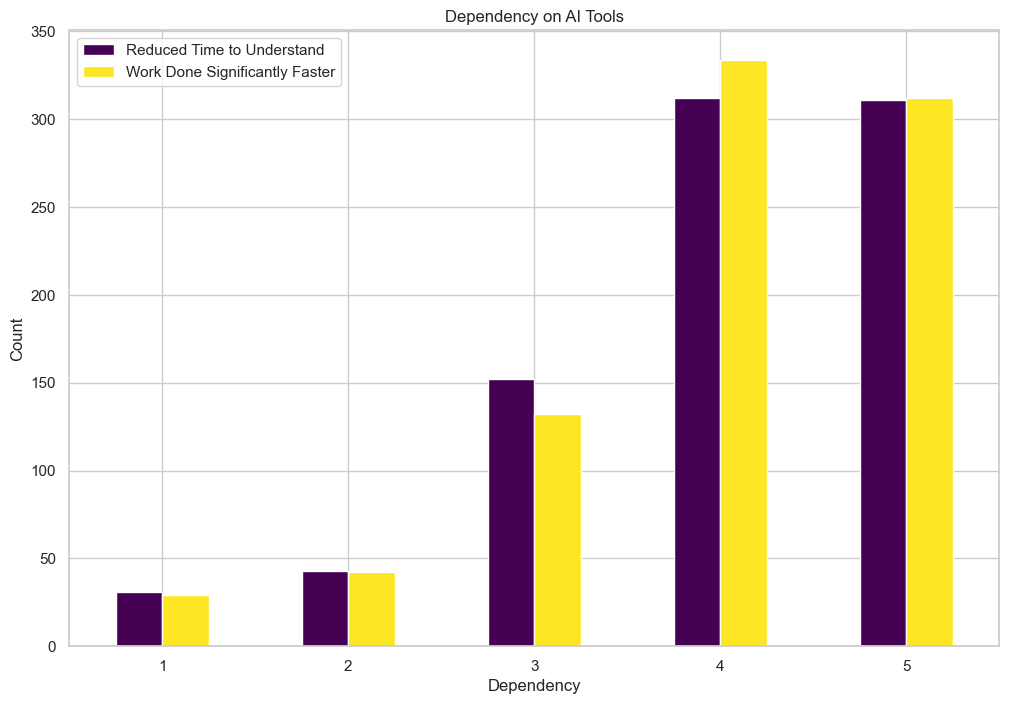

In [35]:
dependency_data_1 = dataset["AI Saves Time"].value_counts()


dependency_data_2 = dataset["Faster Work with AI"].value_counts()


combined_dependency_data = pd.concat(

    [dependency_data_1, dependency_data_2], axis=1, sort=True

).fillna(0)


combined_dependency_data.columns = [

    "Reduced Time to Understand",

    "Work Done Significantly Faster",

]


plt.figure(figsize=(12, 8))


combined_dependency_data.plot(kind="bar", colormap="viridis", ax=plt.gca())


plt.title("Dependency on AI Tools")

plt.xlabel("Dependency")

plt.ylabel("Count")

plt.xticks(rotation=0)

plt.legend()

filename = "../results/dependency_on_ai_tools.png"

plt.savefig(filename)

plt.show()

### Strict Dependency of Task Completion with AI Tools


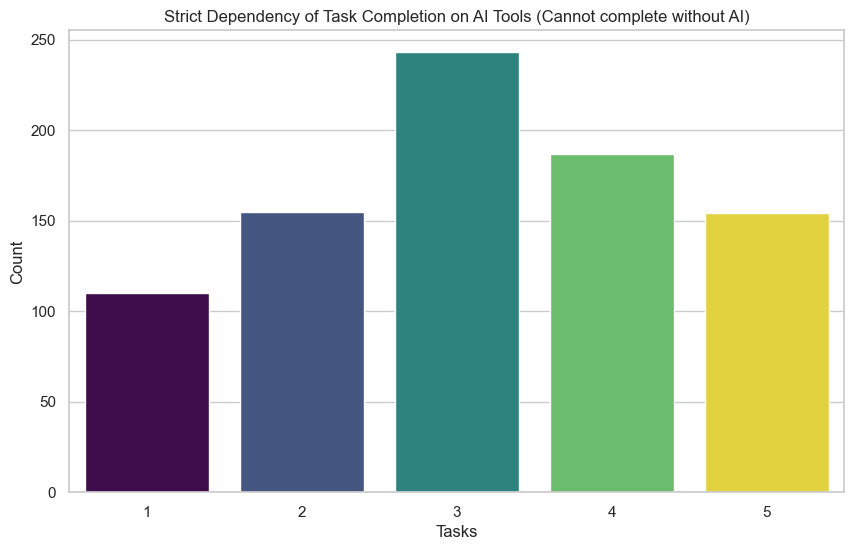

In [36]:
dependency_data = dataset["AI helped Completing Tasks"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=dependency_data.index,
    y=dependency_data.values,
    palette="viridis",
    hue=dependency_data.index,
    legend=False,
)

plt.title(
    "Strict Dependency of Task Completion on AI Tools (Cannot complete without AI)"
)
plt.xlabel("Tasks")
plt.ylabel("Count")
plt.xticks(rotation=0)
filename = "../results/strict_dependency_of_task_completion_on_ai_tools.png"
plt.savefig(filename)
plt.show()

# Ethical Concerns of AI Tools


### Institutions' Sentiment Towards Usage of AI Tools


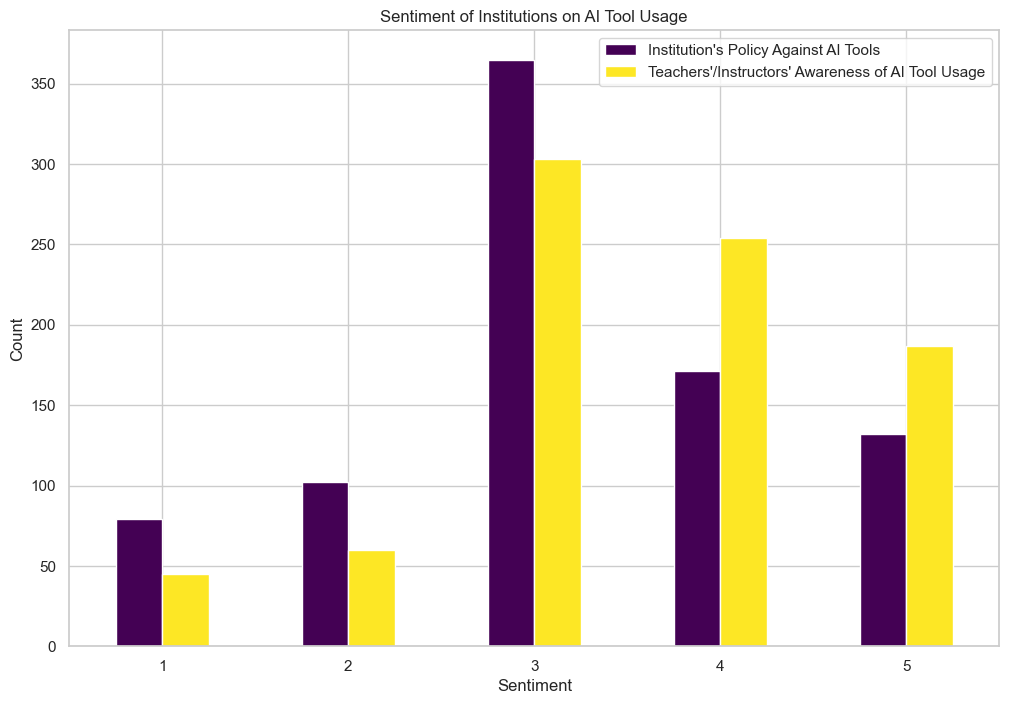

In [37]:
sentiment_data_1 = dataset["Institution's Policy Against AI"].value_counts()

sentiment_data_2 = dataset["Teachers are Aware of AI Use"].value_counts()

combined_sentiment_data = pd.concat(
    [sentiment_data_1, sentiment_data_2], axis=1, sort=True
).fillna(0)

combined_sentiment_data.columns = [
    "Institution's Policy Against AI Tools",
    "Teachers'/Instructors' Awareness of AI Tool Usage",
]

plt.figure(figsize=(12, 8))
combined_sentiment_data.plot(kind="bar", colormap="viridis", ax=plt.gca())
plt.title("Sentiment of Institutions on AI Tool Usage")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend()
filename = "../results/sentiment_of_institutions_on_ai_tool_usage.png"
plt.savefig(filename)

### Participants' Sentiment Towards Usage of AI Tools


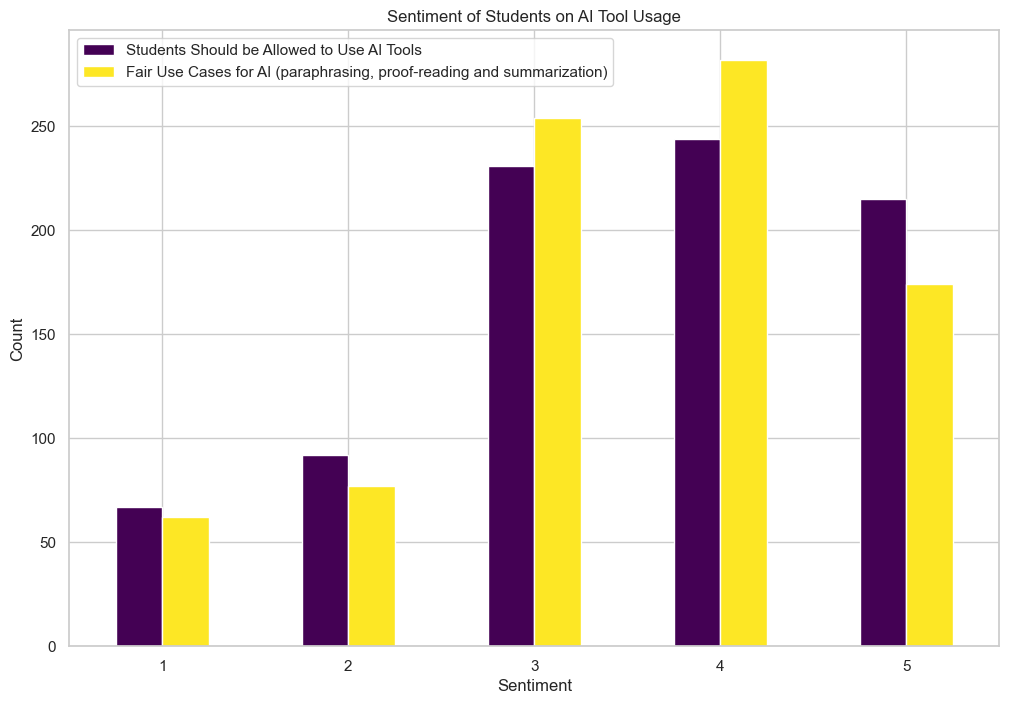

In [39]:
sentiment_data_1 = dataset[
    "Supporting allowance of AI Tools Usage for Students"
].value_counts()

sentiment_data_2 = dataset[
    "Supporting Fair Use - Paraphrasing, Proofing, Summarizing"
].value_counts()

combined_sentiment_data = pd.concat(
    [sentiment_data_1, sentiment_data_2], axis=1, sort=True
).fillna(0)

combined_sentiment_data.columns = [
    "Students Should be Allowed to Use AI Tools",
    "Fair Use Cases for AI (paraphrasing, proof-reading and summarization)",
]

plt.figure(figsize=(12, 8))
combined_sentiment_data.plot(kind="bar", colormap="viridis", ax=plt.gca())
plt.title("Sentiment of Students on AI Tool Usage")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend()
filename = "../results/sentiment_of_students_on_ai_tool_usage.png"
plt.savefig(filename)
plt.show()

### Unfair Usage of AI Tools and Penalization


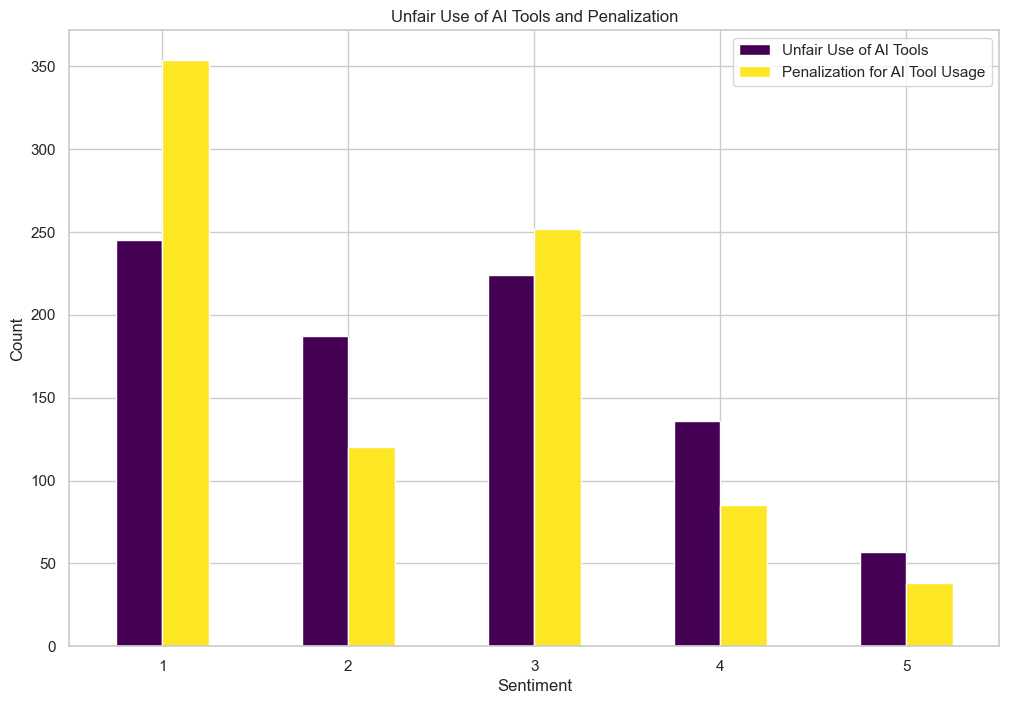

In [40]:
unfair_use_data = dataset["Did Unethical AI Use"].value_counts()

penalization_data = dataset["Penalized for AI Use"].value_counts()

combined_unfair_use_data = pd.concat(
    [unfair_use_data, penalization_data], axis=1, sort=True
).fillna(0)

combined_unfair_use_data.columns = [
    "Unfair Use of AI Tools",
    "Penalization for AI Tool Usage",
]

plt.figure(figsize=(12, 8))
combined_unfair_use_data.plot(kind="bar", colormap="viridis", ax=plt.gca())
plt.title("Unfair Use of AI Tools and Penalization")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend()
filename = "../results/unfair_use_of_ai_tools_and_penalization.png"
plt.savefig(filename)

### Driving Factors for Unfair Usage of AI Tools (All)


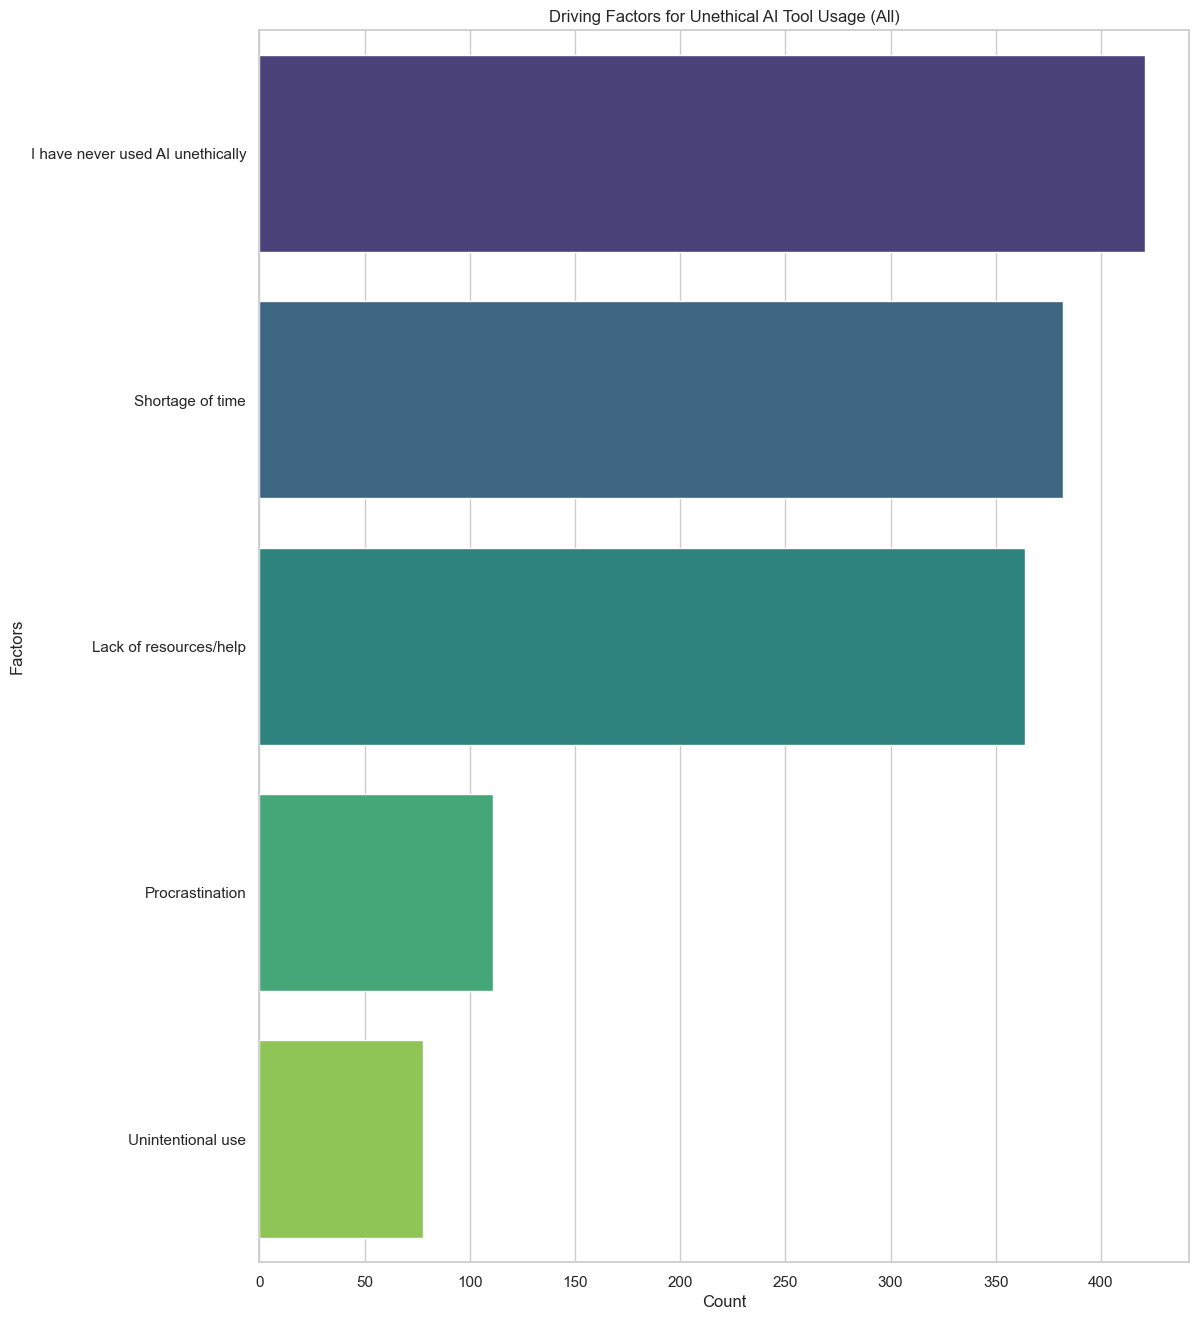

In [42]:
all_driving_factors = (
    dataset["Reasons for Unethical Use"]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()[:5]
)

plt.figure(figsize=(12, 16))
sns.barplot(
    y=all_driving_factors.index,
    x=all_driving_factors.values,
    palette="viridis",
    hue=all_driving_factors.index,
    legend=False,
)
plt.title("Driving Factors for Unethical AI Tool Usage (All)")
plt.xlabel("Count")
plt.ylabel("Factors")
filename = "../results/driving_factors_for_unethical_ai_tool_usage_all.png"
plt.savefig(filename)
plt.show()

### Continuing AI Usage Despite Advise Against It 

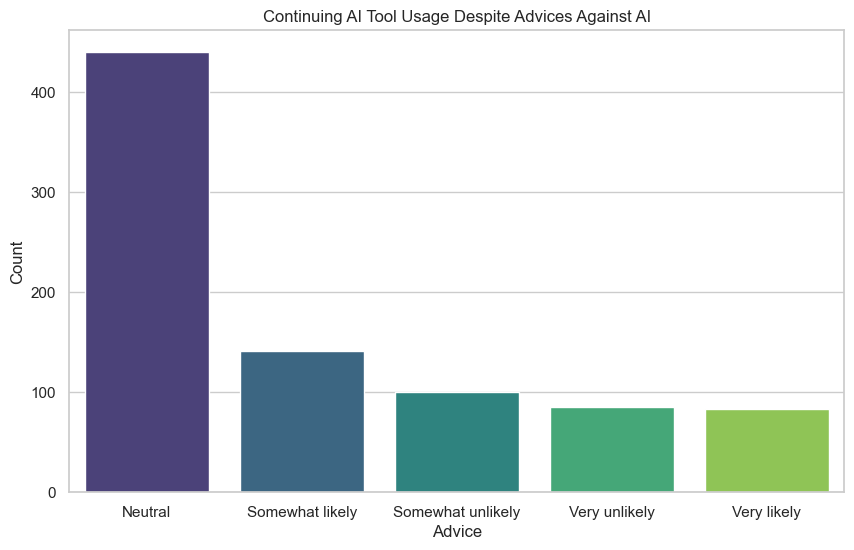

In [44]:
usage_data = dataset["Continuing AI Usage despite Advices Against AI"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=usage_data.index,
    y=usage_data.values,
    palette="viridis",
    hue=usage_data.index,
    legend=False,
)
plt.title("Continuing AI Tool Usage Despite Advices Against AI")
plt.xlabel("Advice")
plt.ylabel("Count")
filename = "../results/continuing_ai_tool_usage_despite_advices_against_ai.png"
plt.savefig(filename)
plt.show()


### Driving Factors for Unfair Usage of AI Tools (Top 10)


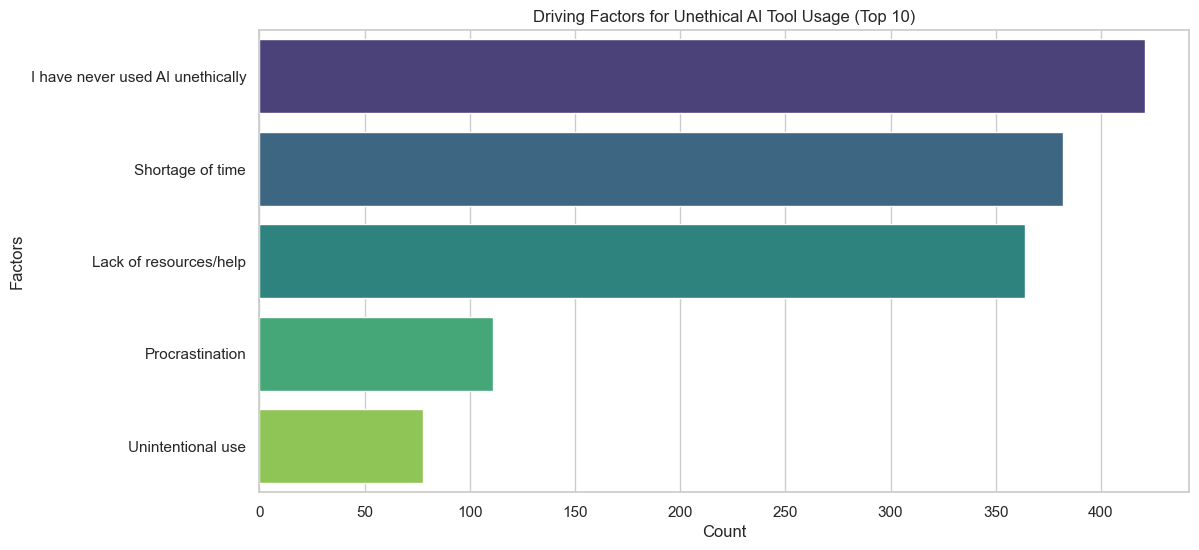

In [43]:
top_10_driving_factors = all_driving_factors[:10]

plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_10_driving_factors.index,
    x=top_10_driving_factors.values,
    palette="viridis",
    hue=top_10_driving_factors.index,
    legend=False,
)
plt.title("Driving Factors for Unethical AI Tool Usage (Top 10)")
plt.xlabel("Count")
plt.ylabel("Factors")
filename = "../results/driving_factors_for_unethical_ai_tool_usage_top_10.png"
plt.savefig(filename)
plt.show()

# Obstacles in AI Tools Usage


### Problems Faced in Using AI Tools


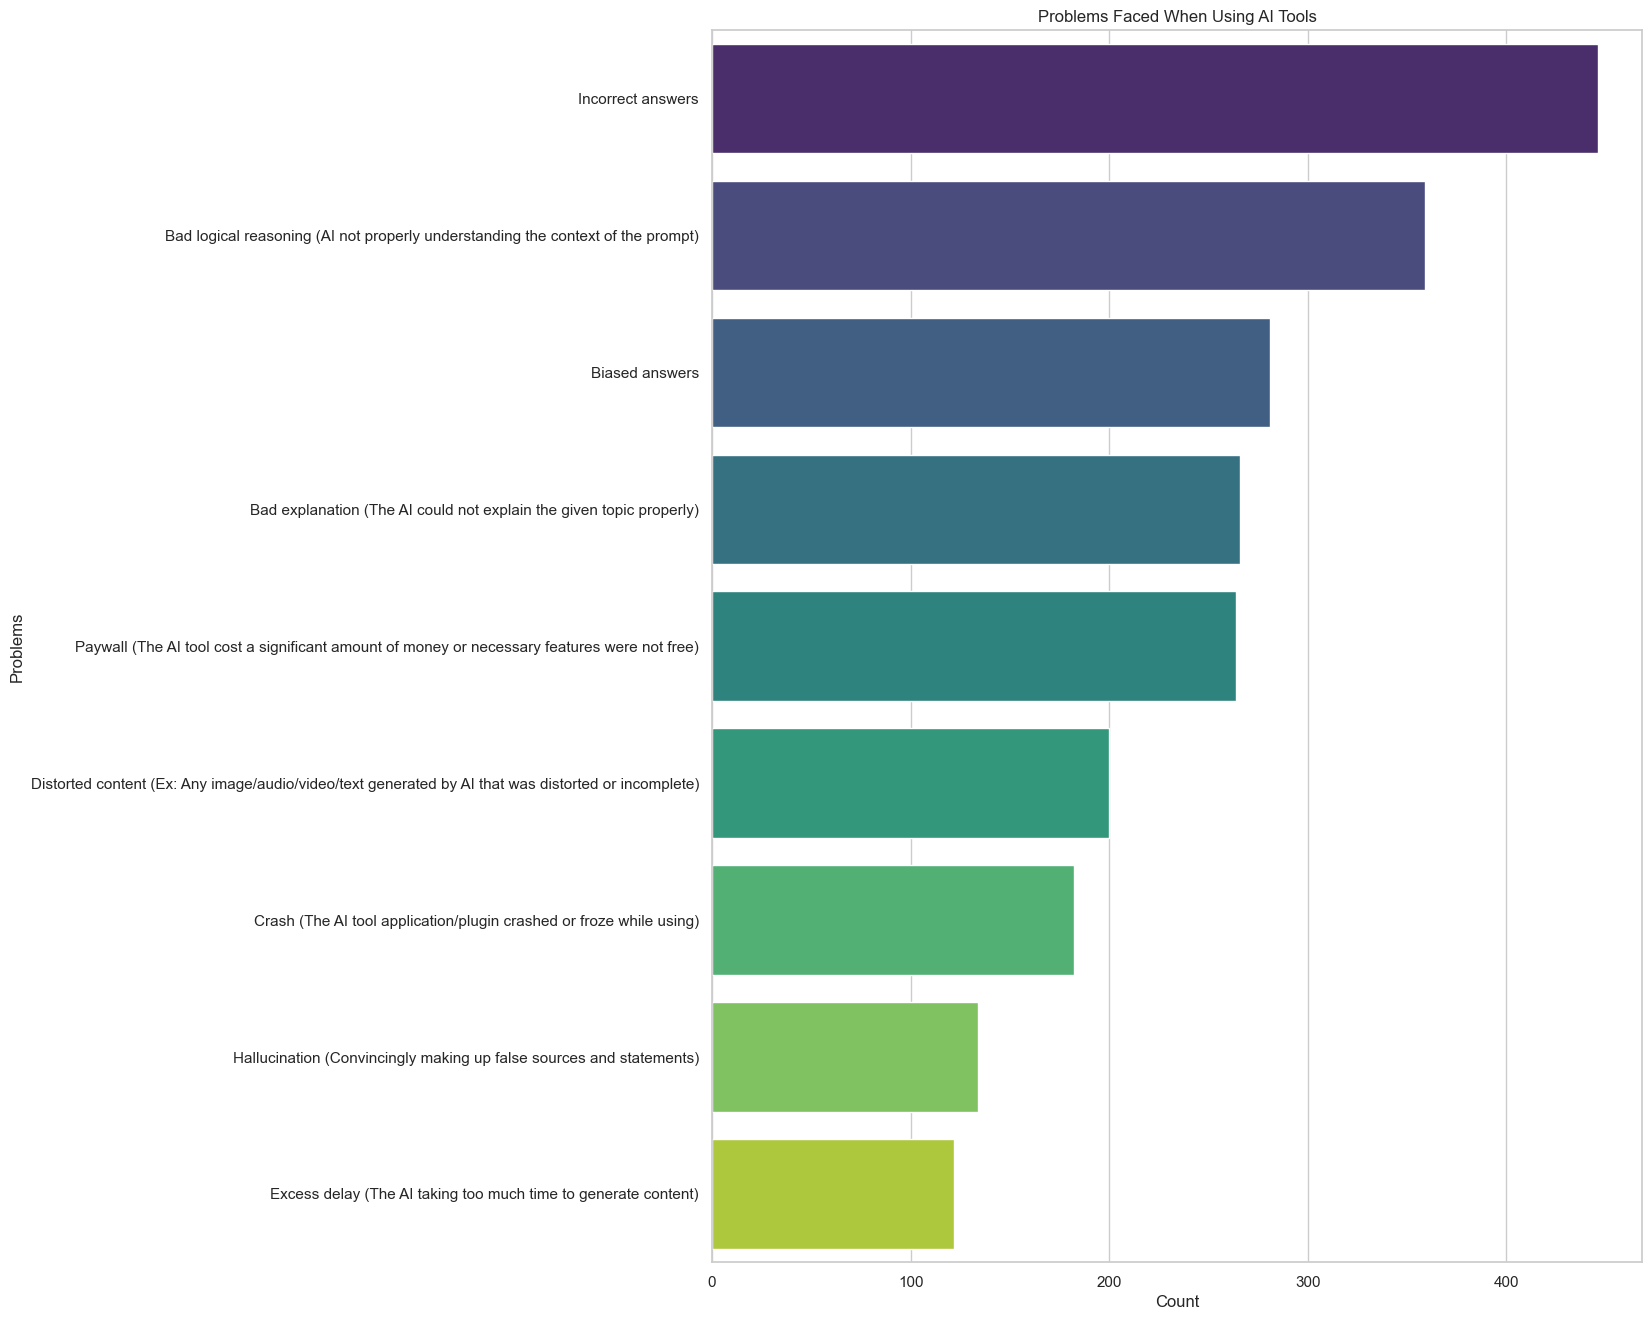

In [45]:
problems_data = (
    dataset["Problem Faced in AI Tools"]
    .str.split(",")
    .dropna()
    .explode()
    .str.strip()
    .value_counts()[:9]
)

plt.figure(figsize=(12, 16))
sns.barplot(
    y=problems_data.index,
    x=problems_data.values,
    palette="viridis",
    hue=problems_data.index,
    legend=False,
)
plt.title("Problems Faced When Using AI Tools")
plt.xlabel("Count")
plt.ylabel("Problems")
filename = "../results/problems_faced_when_using_ai_tools.png"
plt.savefig(filename)
plt.show()

### Privacy Concerns in Using AI Tools


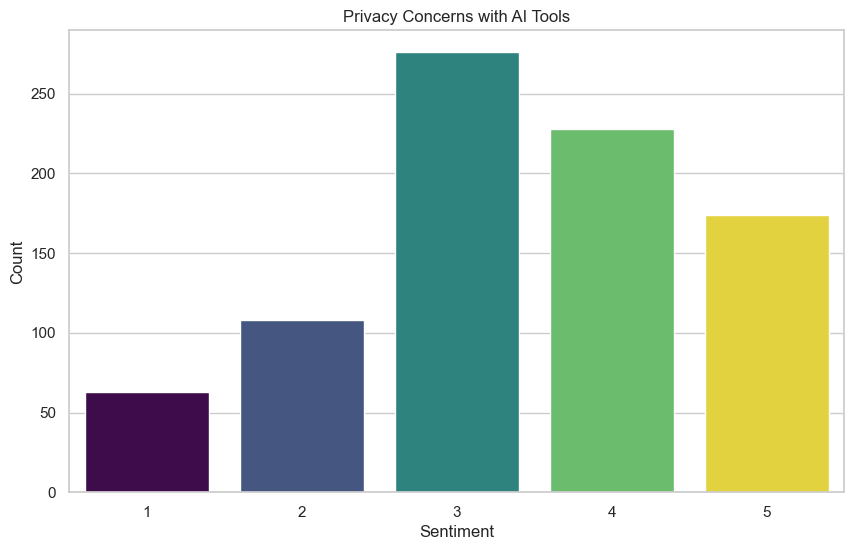

In [46]:
privacy_concern_data = dataset["Privacy Concerns"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=privacy_concern_data.index,
    y=privacy_concern_data.values,
    palette="viridis",
    hue=privacy_concern_data.index,
    legend=False,
)
plt.title("Privacy Concerns with AI Tools")
plt.xlabel("Sentiment")
plt.ylabel("Count")
filename = "../results/privacy_concerns_with_ai_tools.png"
plt.savefig(filename)
plt.show()